[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


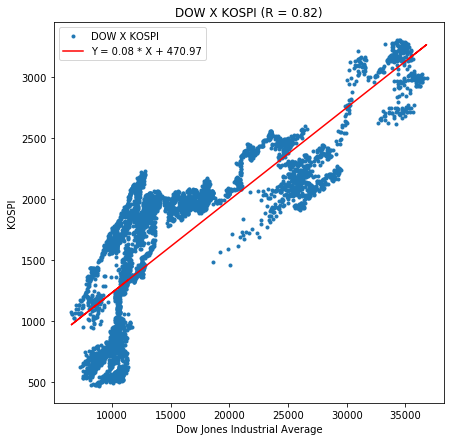

In [1]:
# 앞에선 다우와 KOSPI의 상관관계를 산점도를 이용해 분석했는데,
# 이번엔 stats 모델의 linregress()를 이용해 선형회귀 모델을
# 생성한 뒤 회귀선을 그려서 분석해보자

# 전체 소스코드도 아래에 다시 한번 정리하고 간다

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW X KOSPI', regr_line])
plt.title(f'DOW X KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

[*********************100%***********************]  1 of 1 completed


C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


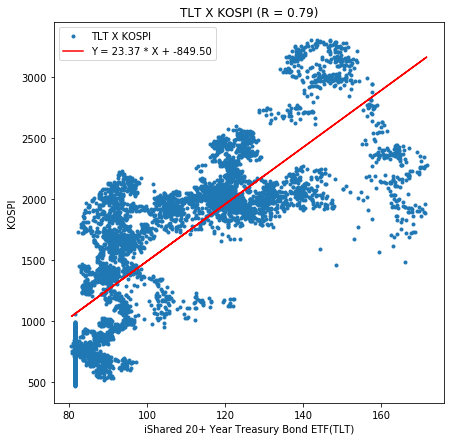

In [2]:
tlt = pdr.get_data_yahoo('tlt', '2002-07-30')
# 미국 국채에 해당하는 부분임

df = pd.DataFrame({'X':tlt['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['TLT X KOSPI', regr_line])
plt.title(f'TLT X KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('iShared 20+ Year Treasury Bond ETF(TLT)')
plt.ylabel('KOSPI')
plt.show()